In [1]:
import pandas as pd
import numpy as np
import category_encoders as ce

data = pd.read_csv('data/apartment_properties_rent.csv')
data

,id,building_type,city,condition,estate_type,floor_space,land_space,price,region,sale_type,source,disposition,equipment,penb
0,845394,UNDEFINED,Mariánské Lázně,UNDEFINED,apartment,20.0,0.0,16340.0,Karlovarský kraj,RENT,bezrealitky,DISP_1_KK,FURNISHED,G
1,600390,PANEL,Brno,VERY_GOOD,apartment,36.0,0.0,9500.0,Jihomoravský kraj,RENT,bezrealitky,DISP_1_KK,PARTIALLY,A
2,843682,BRICK,Brno,VERY_GOOD,apartment,60.0,0.0,20500.0,Jihomoravský kraj,RENT,bezrealitky,DISP_2_1,FURNISHED,G
3,435994,BRICK,Opava,VERY_GOOD,apartment,38.0,0.0,7000.0,Moravskoslezský kraj,RENT,bezrealitky,DISP_1_1,PARTIALLY,G
4,843695,BRICK,Lipník nad Bečvou,VERY_GOOD,apartment,41.0,0.0,5200.0,Olomoucký kraj,RENT,bezrealitky,DISP_1_1,PARTIALLY,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,3488433484,BRICK,Slezská,VERY_GOOD,apartment,40.0,0.0,15000.0,Praha 3 - Vinohrady,RENT,sreality,2+kk,NaN,G
20655,3488122188,BRICK,Na Petřinách,VERY_GOOD,apartment,20.0,0.0,10000.0,Praha - Praha 6,RENT,sreality,NaN,NaN,G
20656,3490301260,BRICK,Újezd,VERY_GOOD,apartment,73.0,0.0,35000.0,Praha 5 - Malá Strana,RENT,sreality,2+kk,NaN,G
20657,3489158476,BRICK,Šimáčkova,NEW,apartment,36.0,0.0,13900.0,Brno - Líšeň,RENT,sreality,2+kk,NaN,G


# Shuffeling the data
To enhance model performance and prevent biases, we shuffle the dataset before training.
 - the data is collected from four different sources, and without shuffling, the model might learn source-specific patterns instead of general market trends.
 - randomizing the order improves generalization, ensuring that the model doesn’t overfit to sequential data points.

In [2]:
data_shuffled = data.sample(n=len(data), random_state=1)
data_shuffled.loc[:, 'condition'] = data_shuffled['condition'].fillna('UNDEFINED')
data_shuffled.loc[:, 'land_space'] = data_shuffled['land_space'].fillna(0)
data_shuffled.loc[:, 'disposition'] = data_shuffled['disposition'].fillna('UNDEFINED')
data_shuffled.loc[:, 'equipment'] = data_shuffled['equipment'].fillna('UNDEFINED')
data_shuffled.loc[:, 'penb'] = data_shuffled['penb'].fillna('G')

data_shuffled

,id,building_type,city,condition,estate_type,floor_space,land_space,price,region,sale_type,source,disposition,equipment,penb
2364,845257,SKELET,Praha,NEW,apartment,51.0,0.0,25900.0,Praha,RENT,bezrealitky,DISP_2_KK,FURNISHED,G
8176,621340e32163093e87306f89,BRICK,Nová Bystřice,GOOD,apartment,55.0,0.0,8500.0,Jihočeský kraj,RENT,idnes,UNDEFINED,UNDEFINED,G
16402,896025932,BRICK,Herlíkovická,VERY_GOOD,apartment,85.0,0.0,13790.0,Praha 9 - Kbely,RENT,sreality,1+kk,UNDEFINED,G
20321,3619317068,PANEL,Bronzová,GOOD,apartment,57.0,0.0,15500.0,Praha 5 - Stodůlky,RENT,sreality,1+kk,UNDEFINED,G
10717,3164026188,BRICK,Truhlářská,VERY_GOOD,apartment,77.0,0.0,32364.0,Praha 1 - Nové Město,RENT,sreality,3+kk,UNDEFINED,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,3063174476,BRICK,Riegrova,AFTER_RECONSTRUCTION,apartment,60.0,0.0,15000.0,Olomouc,RENT,sreality,2+1,UNDEFINED,G
17289,566383948,BRICK,Moravská,AFTER_RECONSTRUCTION,apartment,38.0,0.0,24000.0,Praha 2 - Vinohrady,RENT,sreality,2+kk,UNDEFINED,G
5192,65bcd07e87e41d92e602cf24,MIXED,Ústí nad Labem,UNDEFINED,apartment,55.0,0.0,20000.0,Ústecký kraj,RENT,idnes,UNDEFINED,UNDEFINED,G
12172,2579584332,BRICK,Belgická,VERY_GOOD,apartment,95.0,0.0,40000.0,Praha 2 - Vinohrady,RENT,sreality,3+kk,UNDEFINED,G


## Dropping useless features for this type of model

In [3]:
data_shuffled.drop(['estate_type', 'sale_type', 'source', 'id'], axis=1, inplace=True)

In [5]:
data_shuffled['building_type'].value_counts()


building_type
BRICK         13413
PANEL          4274
MIXED          1981
SKELET          418
UNDEFINED       297
OTHER            83
STONE            38
ASSEMBLED        26
WOODEN           18
WOOD             10
PREFAB            3
LOW_ENERGY        1
Name: count, dtype: int64

In [6]:
data_shuffled['price_per_land_space'] = data_shuffled['price'] / (data_shuffled['land_space'] + 1)
data_shuffled['price_per_land_space'].fillna(0)

data_shuffled['price_per_floor_space'] = data_shuffled['price'] / (data_shuffled['floor_space'] + 1)
data_shuffled['price_per_floor_space'].fillna(0)

2364     498.076923
8176     151.785714
16402    160.348837
20321    267.241379
10717    414.923077
            ...    
10955    245.901639
17289    615.384615
5192     357.142857
12172    416.666667
235      174.418605
Name: price_per_floor_space, Length: 20659, dtype: float64

In [7]:
# Target/Mean encoding
target_cols = ['city', 'region', 'disposition']
target_encoder = ce.TargetEncoder(cols=target_cols)
data_shuffled[target_cols] = target_encoder.fit_transform(data_shuffled[target_cols], data_shuffled['price'])

In [9]:
data_shuffled['condition'].value_counts()

condition
VERY_GOOD                6150
UNDEFINED                5854
GOOD                     3600
AFTER_RECONSTRUCTION     2539
NEW                      2436
BEFORE_RECONSTRUCTION      23
MAINTAINED                 22
UNDER_CONSTRUCTION         15
UNDER_RECONSTRUCTION       10
PROJECT                     7
BAD                         1
IN_RECONSTRUCTION           1
CONSTRUCTION                1
Name: count, dtype: int64

In [11]:
data_shuffled['equipment'].value_counts()

equipment
UNDEFINED      18572
FURNISHED        963
PARTIALLY        867
UNFURNISHED      257
Name: count, dtype: int64

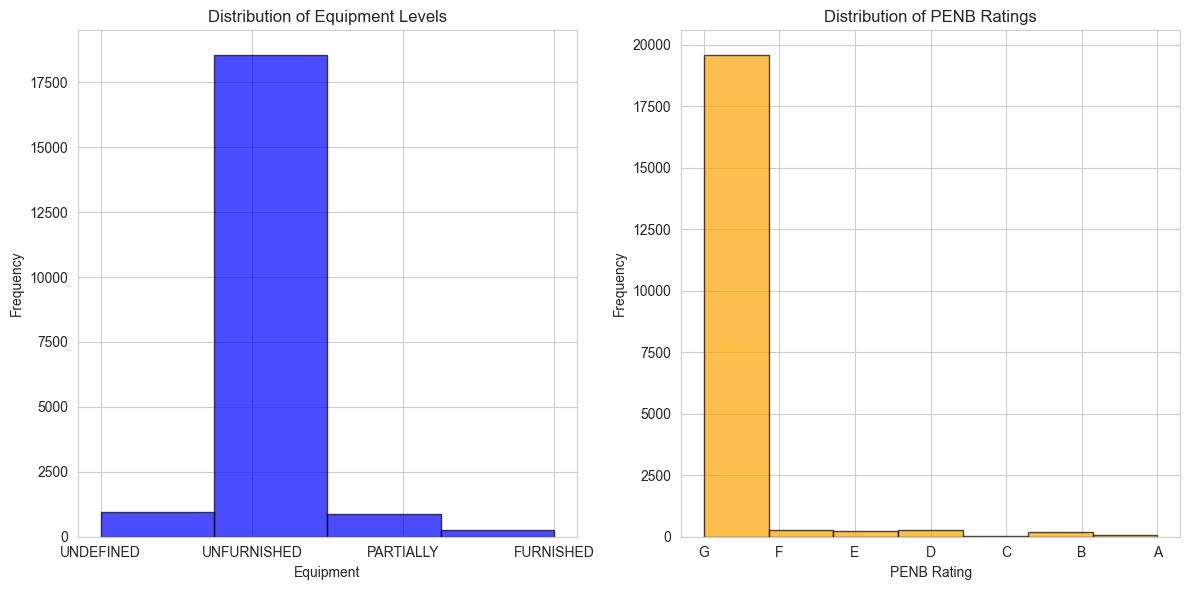

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data_shuffled['equipment'], bins=4, edgecolor='black', color='blue', alpha=0.7)
plt.xticks([0, 1, 2, 3], ['UNDEFINED', 'UNFURNISHED', 'PARTIALLY', 'FURNISHED'])
plt.xlabel('Equipment')
plt.ylabel('Frequency')
plt.title('Distribution of Equipment Levels')

plt.subplot(1, 2, 2)
plt.hist(data_shuffled['penb'], bins=7, edgecolor='black', color='orange', alpha=0.7)
plt.xticks(range(7), ['G', 'F', 'E', 'D', 'C', 'B', 'A'])
plt.xlabel('PENB Rating')
plt.ylabel('Frequency')
plt.title('Distribution of PENB Ratings')

plt.tight_layout()
plt.show()

In [13]:
# Ordinal encoding
equipment_mapping = {'UNDEFINED': 0, 'UNFURNISHED': 1, 'PARTIALLY': 2, 'FURNISHED': 3}
penb_mapping = {'G': 0, 'F': 1, 'E': 2, 'D': 3, 'C': 4, 'B': 5, 'A': 6}

data_shuffled['equipment'] = data_shuffled['equipment'].map(equipment_mapping)
data_shuffled['penb'] = data_shuffled['penb'].map(penb_mapping)

In [14]:
data_shuffled

,building_type,city,condition,floor_space,land_space,price,region,disposition,equipment,penb,price_per_land_space,price_per_floor_space
2364,SKELET,27316.454188,NEW,51.0,0.0,25900.0,26343.168919,20545.931667,3,0,25900.0,498.076923
8176,BRICK,17173.195828,GOOD,55.0,0.0,8500.0,12256.793451,17707.306563,0,0,8500.0,151.785714
16402,BRICK,18191.317444,VERY_GOOD,85.0,0.0,13790.0,18953.304090,13106.550237,0,0,13790.0,160.348837
20321,PANEL,18339.006995,GOOD,57.0,0.0,15500.0,22964.597802,13106.550237,0,0,15500.0,267.241379
10717,BRICK,42758.222081,VERY_GOOD,77.0,0.0,32364.0,44831.888284,30951.278135,0,0,32364.0,414.923077
...,...,...,...,...,...,...,...,...,...,...,...,...
10955,BRICK,15791.189048,AFTER_RECONSTRUCTION,60.0,0.0,15000.0,15764.332544,13660.433775,0,0,15000.0,245.901639
17289,BRICK,19311.334468,AFTER_RECONSTRUCTION,38.0,0.0,24000.0,40064.251656,18754.046573,0,0,24000.0,615.384615
5192,MIXED,9739.325492,UNDEFINED,55.0,0.0,20000.0,10423.133929,17707.306563,0,0,20000.0,357.142857
12172,BRICK,25875.244504,VERY_GOOD,95.0,0.0,40000.0,40064.251656,30951.278135,0,0,40000.0,416.666667


In [15]:
data_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20659 entries, 2364 to 235
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   building_type          20562 non-null  object 
 1   city                   20632 non-null  float64
 2   condition              20659 non-null  object 
 3   floor_space            20656 non-null  float64
 4   land_space             20659 non-null  float64
 5   price                  20517 non-null  float64
 6   region                 20656 non-null  float64
 7   disposition            20659 non-null  float64
 8   equipment              20659 non-null  int64  
 9   penb                   20659 non-null  int64  
 10  price_per_land_space   20517 non-null  float64
 11  price_per_floor_space  20514 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 2.0+ MB


In [17]:
data_shuffled.dropna(inplace=True)

In [18]:
data_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20423 entries, 2364 to 235
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   building_type          20423 non-null  object 
 1   city                   20423 non-null  float64
 2   condition              20423 non-null  object 
 3   floor_space            20423 non-null  float64
 4   land_space             20423 non-null  float64
 5   price                  20423 non-null  float64
 6   region                 20423 non-null  float64
 7   disposition            20423 non-null  float64
 8   equipment              20423 non-null  int64  
 9   penb                   20423 non-null  int64  
 10  price_per_land_space   20423 non-null  float64
 11  price_per_floor_space  20423 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 2.0+ MB


In [19]:
df = data_shuffled.drop('price', axis=1)
y = data_shuffled['price']

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

numeric_features = df.select_dtypes(include=[np.number]).columns
categorical_features = ['condition', 'building_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_features)
    ]
)

X_preprocessed = preprocessor.fit_transform(df)

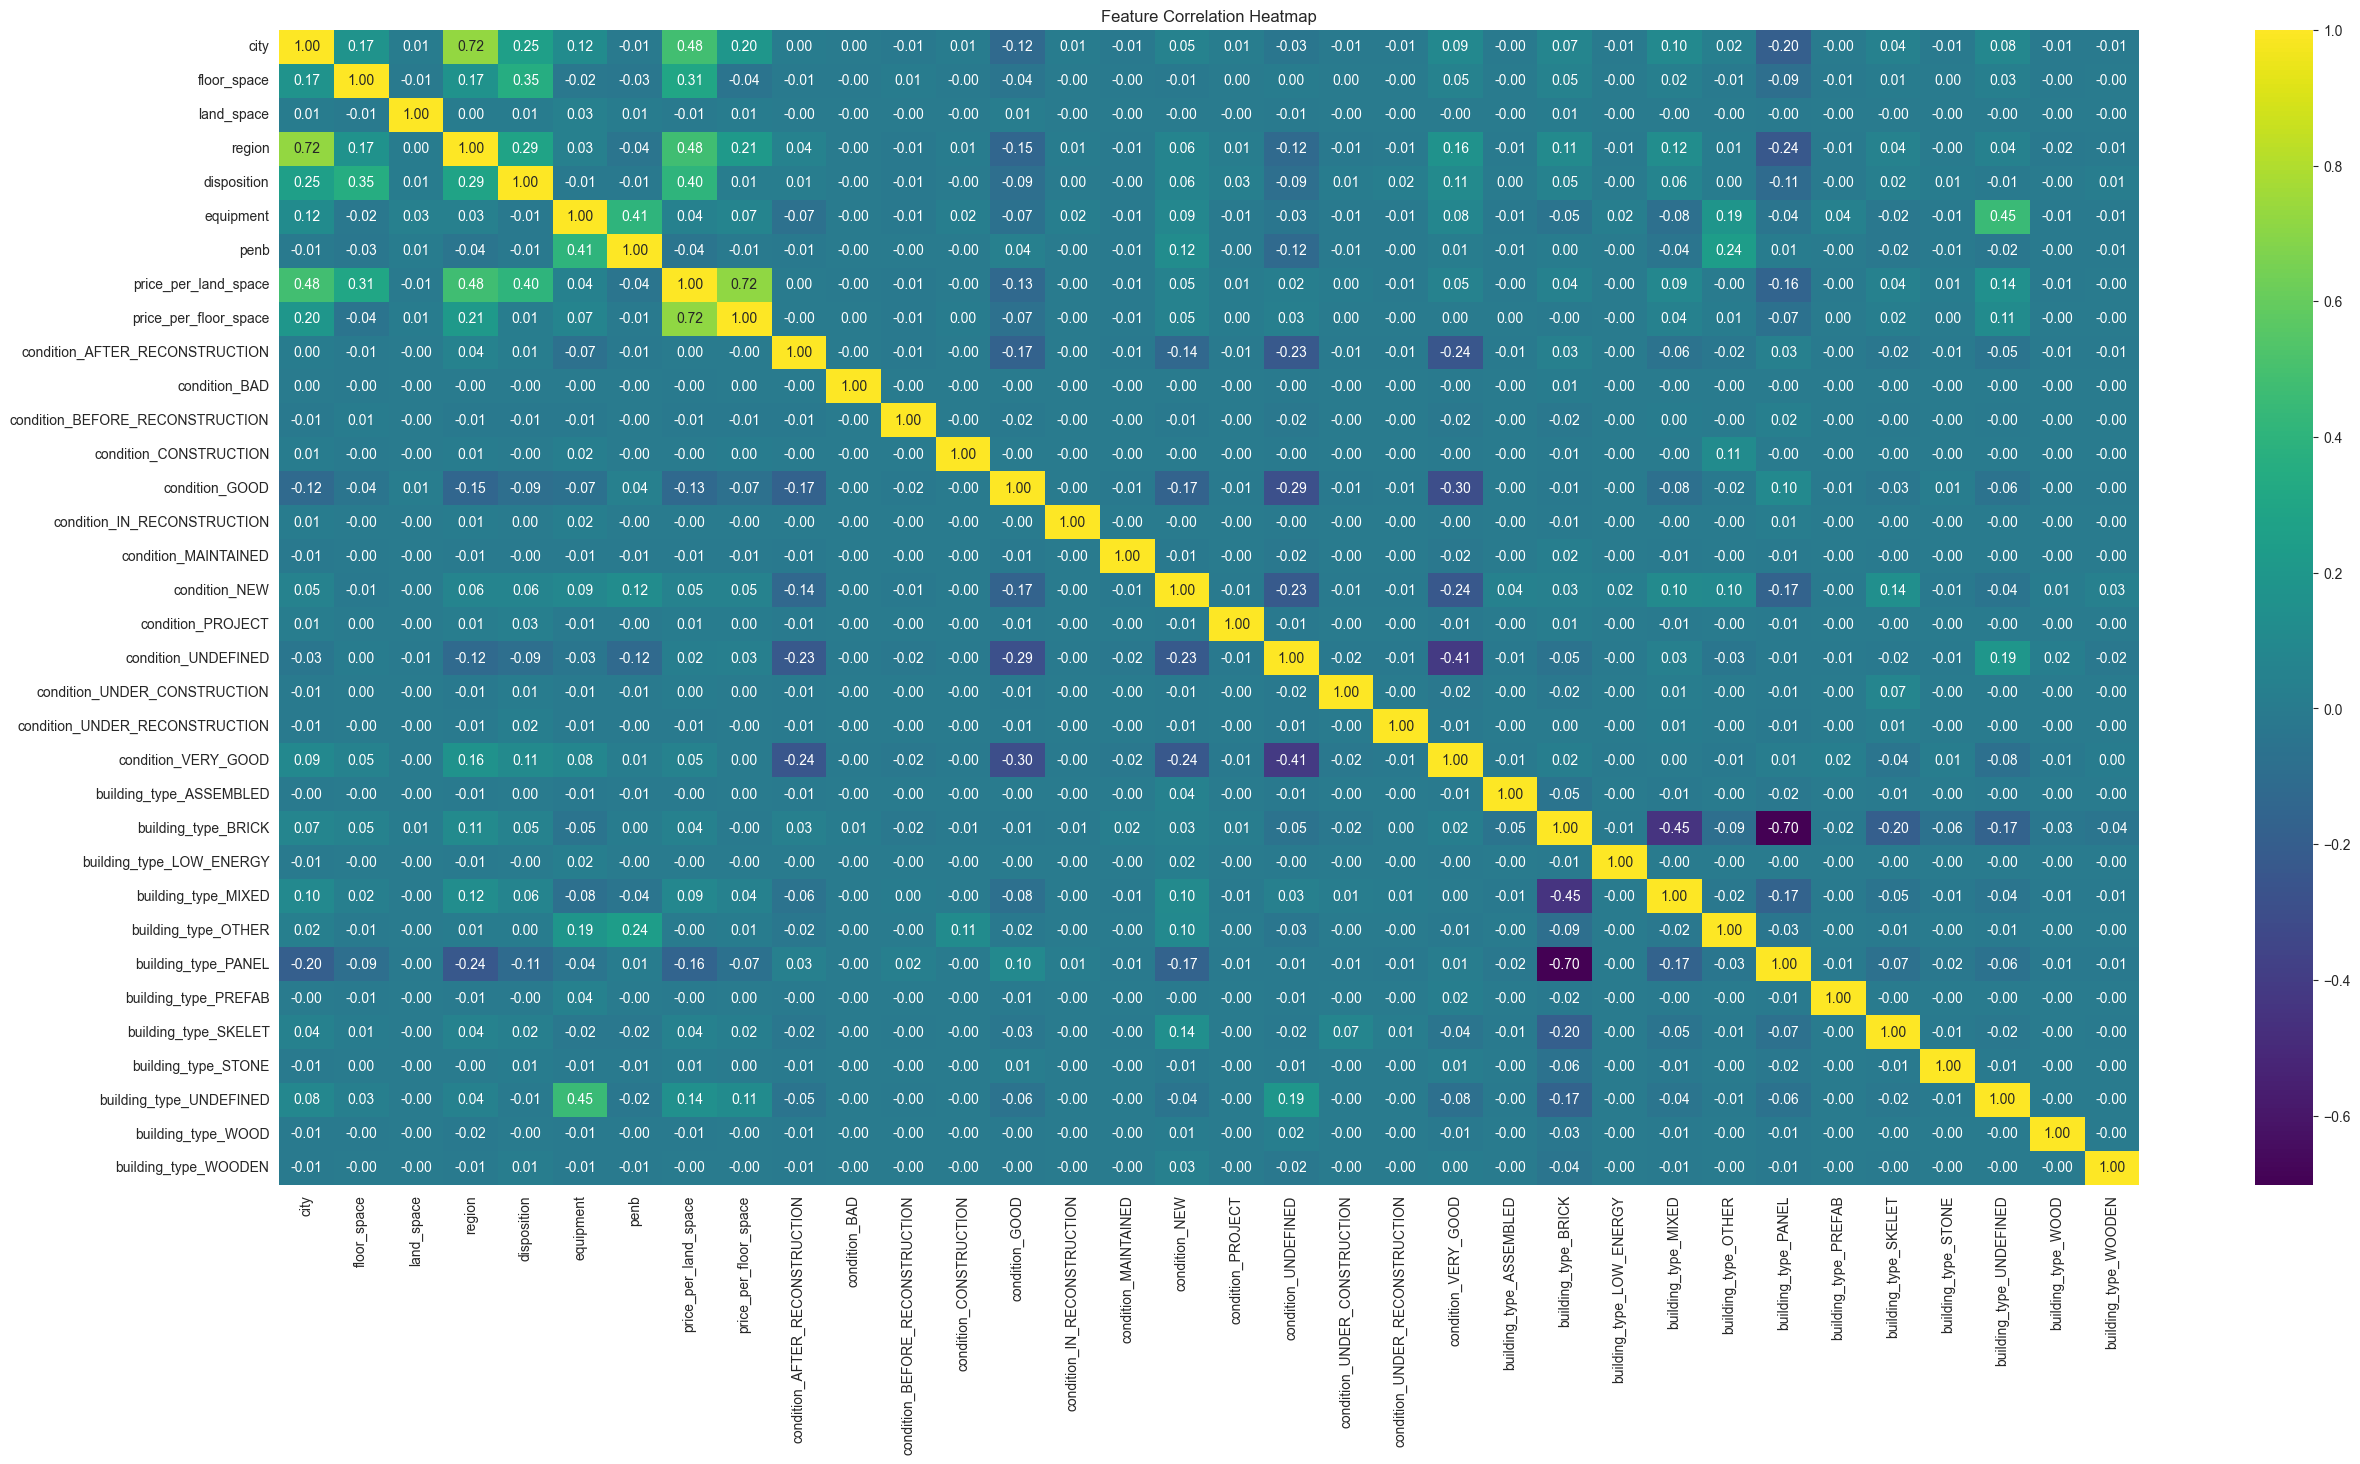

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_feature_names = numeric_features

categorical_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

all_feature_names = list(numeric_feature_names) + list(categorical_feature_names)

X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=all_feature_names)

correlation_matrix = X_preprocessed_df.corr()

plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


#### Neural Network Multilayer Perceptron
- Performance: The model achieved an MAE of **77.48**.
- Training vs Validation: The plot indicates a decreasing trend for both training and validation losses, although there is a room for an improvement.

Epoch 1/25
3064/3064 ━━━━━━━━━━━━━━━━━━━━ 2s 548us/step - loss: 5042.6909 - mean_absolute_error: 5041.3589 - val_loss: 762.1963 - val_mean_absolute_error: 760.4938 - learning_rate: 0.0010
Epoch 2/25
3064/3064 ━━━━━━━━━━━━━━━━━━━━ 2s 519us/step - loss: 724.3831 - mean_absolute_error: 722.6082 - val_loss: 426.3271 - val_mean_absolute_error: 424.4312 - learning_rate: 0.0010
Epoch 3/25
3064/3064 ━━━━━━━━━━━━━━━━━━━━ 2s 518us/step - loss: 397.9545 - mean_absolute_error: 396.0371 - val_loss: 340.2907 - val_mean_absolute_error: 338.3350 - learning_rate: 0.0010
Epoch 4/25
3064/3064 ━━━━━━━━━━━━━━━━━━━━ 2s 514us/step - loss: 351.4167 - mean_absolute_error: 349.4419 - val_loss: 264.3709 - val_mean_absolute_error: 262.3637 - learning_rate: 0.0010
Epoch 5/25
3064/3064 ━━━━━━━━━━━━━━━━━━━━ 2s 505us/step - loss: 380.3722 - mean_absolute_error: 378.3582 - val_loss: 168.5197 - val_mean_absolute_error: 166.4901 - learning_rate: 0.0010
Epoch 6/25
3064/3064 ━━━━━━━━━━━━━━━━━━━━ 2s 504us/step - loss: 295.

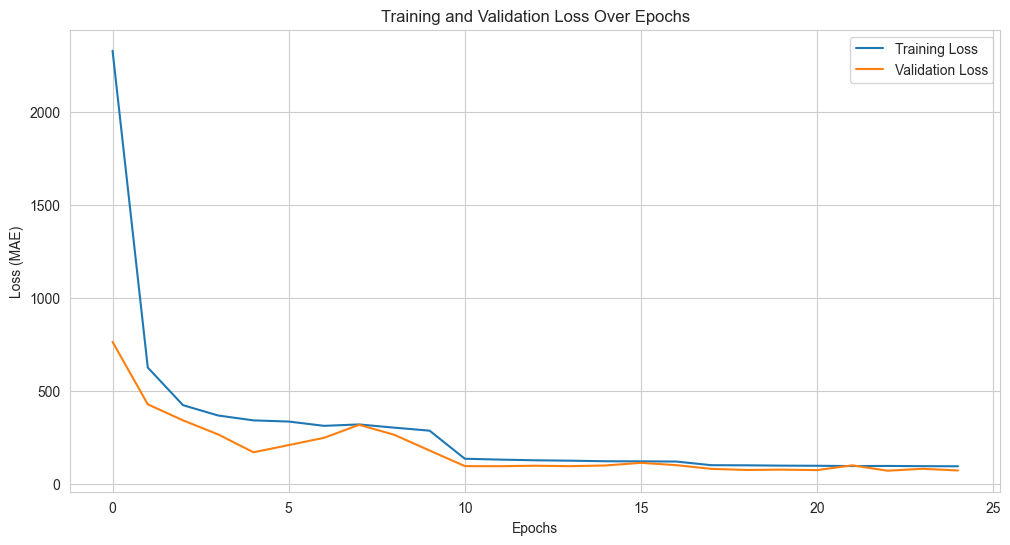

In [25]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Multilayer perceptron

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

large_nn = Sequential()
large_nn.add(InputLayer(shape=(X_train_scaled.shape[1],)))
large_nn.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
large_nn.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
large_nn.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
large_nn.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
large_nn.add(Dense(1, activation='linear'))

opt = Adam(learning_rate=0.001)
cp = ModelCheckpoint('models/multilayer_perceptron.keras', save_best_only=True, monitor='val_loss', mode='min')
es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

large_nn.compile(optimizer=opt, loss='mae', metrics=[MeanAbsoluteError()])

history = large_nn.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=25,
    batch_size=4,
    callbacks=[cp, es, rlr]
)

y_pred = large_nn.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.show()

#### Convolutional Neural Network
- Performance: The CNN achieved the lowest MAE of **36.37**, making it the best-performing model for this dataset.
- Training vs Validation: The training and validation losses followed a closely aligned decreasing trend which is far better than previous used neural network.

Epoch 1/25
3064/3064 ━━━━━━━━━━━━━━━━━━━━ 3s 846us/step - loss: 9652.6270 - mae: 9651.5283 - val_loss: 3516.9404 - val_mae: 3514.8711 - learning_rate: 5.0000e-04
Epoch 2/25
3064/3064 ━━━━━━━━━━━━━━━━━━━━ 2s 807us/step - loss: 2672.1289 - mae: 2669.9336 - val_loss: 1121.4368 - val_mae: 1119.0103 - learning_rate: 5.0000e-04
Epoch 3/25
3064/3064 ━━━━━━━━━━━━━━━━━━━━ 3s 857us/step - loss: 1058.4722 - mae: 1056.0308 - val_loss: 693.5163 - val_mae: 690.9940 - learning_rate: 5.0000e-04
Epoch 4/25
3064/3064 ━━━━━━━━━━━━━━━━━━━━ 2s 802us/step - loss: 705.6986 - mae: 703.1598 - val_loss: 467.3813 - val_mae: 464.7867 - learning_rate: 5.0000e-04
Epoch 5/25
3064/3064 ━━━━━━━━━━━━━━━━━━━━ 3s 814us/step - loss: 423.0539 - mae: 420.4385 - val_loss: 265.1710 - val_mae: 262.4914 - learning_rate: 5.0000e-04
Epoch 6/25
3064/3064 ━━━━━━━━━━━━━━━━━━━━ 2s 798us/step - loss: 316.2668 - mae: 313.5755 - val_loss: 182.7452 - val_mae: 180.0176 - learning_rate: 5.0000e-04
Epoch 7/25
3064/3064 ━━━━━━━━━━━━━━━━━━━━ 

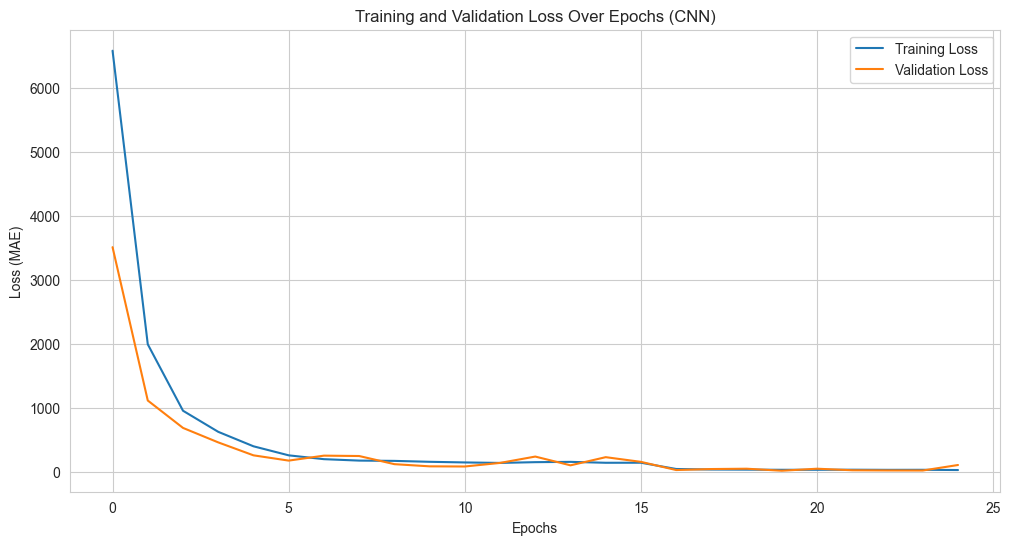

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Conv2D, Flatten, Reshape
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2

#Convolutional neural network

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

num_features = X_preprocessed.shape[1]
X_train_cnn = X_train_scaled.reshape(-1, num_features, 1, 1)
X_val_cnn = X_val_scaled.reshape(-1, num_features, 1, 1)
X_test_cnn = X_test_scaled.reshape(-1, num_features, 1, 1)

cnn = Sequential()
cnn.add(InputLayer(shape=(num_features, 1, 1)))
cnn.add(Conv2D(filters=16, kernel_size=(3, 1), activation='relu'))
cnn.add(Conv2D(filters=32, kernel_size=(3, 1), activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(Dense(1, activation='linear'))

opt = Adam(learning_rate=0.0005)
cp = ModelCheckpoint('models/convolutional_neural_network.keras', save_best_only=True, monitor='val_loss', mode='min')
es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

cnn.compile(optimizer=opt, loss='mae', metrics=['mae'])

history = cnn.fit(
    X_train_cnn, y_train,
    validation_data=(X_val_cnn, y_val),
    epochs=25,
    batch_size=4,
    callbacks=[cp, es, rlr]
)

y_pred = cnn.predict(X_test_cnn)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.title('Training and Validation Loss Over Epochs (CNN)')
plt.show()